In [ ]:

import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/diamonds.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'carat_weight', 'total_sales_price'
]
# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['cut', 'color', 'clarity'])  # Features (input variables)
y = df[['cut', 'color', 'clarity']] # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file

Number of columns in the dataset: 26
Columns in the dataset:
Unnamed: 0
cut
color
clarity
carat_weight
cut_quality
lab
symmetry
polish
eye_clean
culet_size
culet_condition
depth_percent
table_percent
meas_length
meas_width
meas_depth
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity
total_sales_price
Number of columns after dropping irrelevant ones: 24
Remaining columns in the DataFrame: ['Unnamed: 0', 'cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('separated_target_variables.csv', low_memory=False)

X = df.drop(columns=['cut', 'color', 'clarity'])  # Features (input variables)
y = df[['cut', 'color', 'clarity']] # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Missing values in features (X):
Column: Unnamed: 0, Missing Values: 0
Column: cut_quality, Missing Values: 0
Column: lab, Missing Values: 0
Column: symmetry, Missing Values: 0
Column: polish, Missing Values: 0
Column: eye_clean, Missing Values: 0
Column: culet_size, Missing Values: 0
Column: culet_condition, Missing Values: 0
Column: depth_percent, Missing Values: 0
Column: table_percent, Missing Values: 0
Column: meas_length, Missing Values: 0
Column: meas_width, Missing Values: 0
Column: meas_depth, Missing Values: 0
Column: girdle_min, Missing Values: 0
Column: girdle_max, Missing Values: 0
Column: fluor_color, Missing Values: 0
Column: fluor_intensity, Missing Values: 143491
Column: fancy_color_dominant_color, Missing Values: 0
Column: fancy_color_secondary_color, Missing Values: 0
Column: fancy_color_overtone, Missing Values: 1650
Column: fancy_color_intensity, Missing Values: 0

Missing values in target variables (y):
Column: cut, Missing Values: 0
Column: color, Missing Values: 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


data = pd.read_csv('separated_target_variables.csv', low_memory=False)


# Handling missing values in numerical columns by replacing them with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create an imputer for numerical columns (using median strategy)
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handling missing values in categorical columns by replacing them with the mode
categorical_columns = data.select_dtypes(include=['object']).columns

# Create an imputer for categorical columns (using most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Optional: Check for any remaining missing values
missing_values = data.isnull().sum()

print("Missing values after imputation:\n", missing_values)

# Save the cleaned data to a new file if needed
data.to_csv('cleaned_dataset.csv', index=False)

Missing values after imputation:
 Unnamed: 0                     0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
cut                            0
color                          0
clarity                        0
dtype: int64


In [ ]:
pip install imbalanced-learn

<ipython-input-6-3fa98f2a4686>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y1, palette="viridis")
<ipython-input-6-3fa98f2a4686>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y2, palette="viridis")
<ipython-input-6-3fa98f2a4686>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y3, palette="viridis")


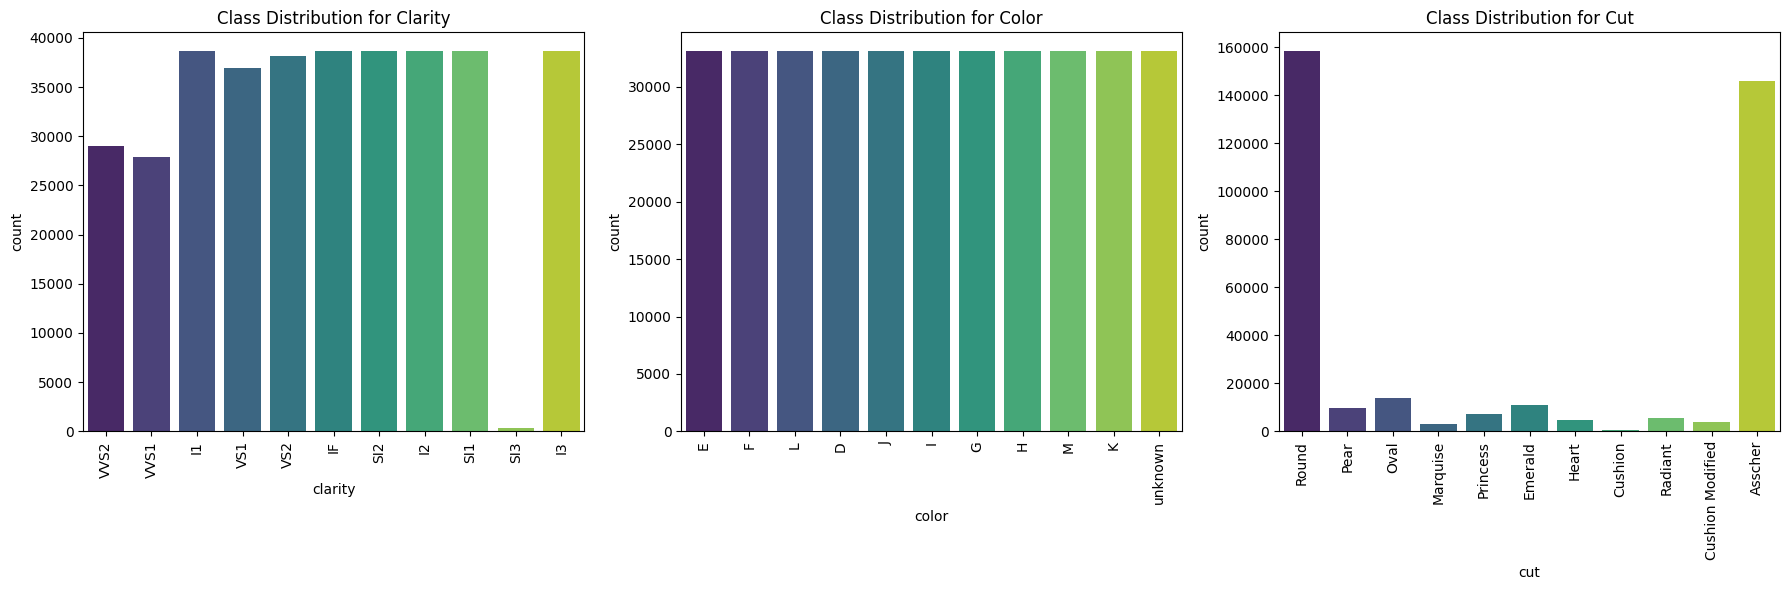

Dataset after resampling has been saved as 'resampled_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed dataset
data = pd.read_csv('/content/cleaned_dataset.csv', low_memory=False)

X = df.drop(columns=['cut', 'color', 'clarity'])  # Features (input variables)
y = df[['cut', 'color', 'clarity']] # Target variables

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample each target variable separately
X_resampled_clarity, y_resampled_clarity = ros.fit_resample(X, y['clarity'])
X_resampled_color, y_resampled_color = ros.fit_resample(X, y['color'])
X_resampled_cut, y_resampled_cut = ros.fit_resample(X, y['cut'])

# Combine the resampled target variables into a DataFrame
y_resampled = pd.DataFrame({
    'clarity': y_resampled_clarity,
    'color': y_resampled_color,
    'cut': y_resampled_cut
})

# Ensure that all resampled datasets have the same number of rows
min_length = min(len(y_resampled_clarity), len(y_resampled_color), len(y_resampled_cut))

X_resampled_final = X_resampled_clarity.iloc[:min_length]
y_resampled_final = y_resampled.iloc[:min_length]

# Step 2: Plot class distributions
def plot_class_distribution(y1, y2, y3):
    plt.figure(figsize=(18, 6))  # Set a large figure size for side-by-side plots

    # Plot clarity distribution
    plt.subplot(1, 3, 1)  # (rows, columns, plot number)
    sns.countplot(x=y1, palette="viridis")
    plt.title("Class Distribution for Clarity")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis")
    plt.title("Class Distribution for Color")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis")
    plt.title("Class Distribution for Cut")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot distributions for resampled target variables
plot_class_distribution(y_resampled_final['clarity'], y_resampled_final['color'], y_resampled_final['cut'])

# Step 3: Save the resampled dataset
final_resampled_data = pd.concat([X_resampled_final, y_resampled_final], axis=1)
final_resampled_data.to_csv('resampled_dataset.csv', index=False)

print("Dataset after resampling has been saved as 'resampled_dataset.csv'")

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file (after RandomOverSampler)
data = pd.read_csv('resampled_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 4: Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Assuming 'clarity', 'color', 'cut' are the target columns
y = data[['clarity', 'color', 'cut']]  # The target variables

# Step 5: Handle missing values for target columns (impute with 'Unknown')
y.loc[:, 'clarity'] = y['clarity'].fillna('Unknown')
y.loc[:, 'color'] = y['color'].fillna('Unknown')
y.loc[:, 'cut'] = y['cut'].fillna('Unknown')

# Step 6: Encode categorical columns in X (features) using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 7: Encode the target variables (clarity, color, cut) using LabelEncoder
label_encoder_clarity = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_cut = LabelEncoder()

# Fit the encoders on the target variables
label_encoder_clarity.fit(y['clarity'])
label_encoder_color.fit(y['color'])
label_encoder_cut.fit(y['cut'])

# Use .loc to avoid SettingWithCopyWarning
y.loc[:, 'clarity'] = label_encoder_clarity.transform(y['clarity'])
y.loc[:, 'color'] = label_encoder_color.transform(y['color'])
y.loc[:, 'cut'] = label_encoder_cut.transform(y['cut'])

# Check if there are any missing values in the encoded data (features and target)
missing_values_after_encoding = pd.concat([X, y], axis=1).isnull().sum()
print("\nMissing values after encoding:\n", missing_values_after_encoding)

# Step 8: Handle missing values after encoding (if any)
# In case any new missing values appeared during encoding, we can handle them as follows:
# For numerical columns (in features):
numerical_cols_encoded = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols_encoded] = X[numerical_cols_encoded].fillna(X[numerical_cols_encoded].mean())

# For categorical columns (in features and target variables):
categorical_cols_encoded = X.select_dtypes(include=['object']).columns
for col in categorical_cols_encoded:
    X[col] = X[col].fillna(X[col].mode()[0])

# Handle missing values in target columns after encoding (if any)
y.loc[:, 'clarity'] = y['clarity'].fillna(label_encoder_clarity.classes_[0])
y.loc[:, 'color'] = y['color'].fillna(label_encoder_color.classes_[0])
y.loc[:, 'cut'] = y['cut'].fillna(label_encoder_cut.classes_[0])

# Step 9: Combine the encoded features and target variables back into a single DataFrame
encoded_data = pd.concat([X, y], axis=1)

# Step 10: Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_resampled_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")

Missing values after imputation (before encoding):
 Unnamed: 0                     0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
clarity                        0
color                          0
cut                            0
dtype: int64

Missing values after encoding:
 Unnamed: 0                     0
cut_quality                    0
lab                            0
symmetry   

In [ ]:
import pandas as pd

# Step 1: Read the encoded CSV file
encoded_data = pd.read_csv('encoded_resampled_dataset.csv')  # Replace with your actual dataset path

# Step 2: Check the class distribution (balance) for 'clarity', 'color', and 'cut'
print("Class Distribution (Counts) after encoding and preprocessing:")

# For Clarity
print("Clarity:\n", encoded_data['clarity'].value_counts(), "\n")

# For Color
print("Color:\n", encoded_data['color'].value_counts(), "\n")

# For Cut
print("Cut:\n", encoded_data['cut'].value_counts(), "\n")

Class Distribution (Counts) after encoding and preprocessing:
Clarity:
 clarity
0     38627
3     38627
5     38627
1     38627
4     38627
2     38627
8     38173
7     36956
10    28985
9     27877
6       380
Name: count, dtype: int64 

Color:
 color
1     33103
2     33103
8     33103
0     33103
6     33103
5     33103
3     33103
4     33103
9     33103
7     33103
10    33103
Name: count, dtype: int64 

Cut:
 cut
10    158316
0     146126
6      13857
3      11091
7       9860
8       7050
9       5630
4       4774
2       3984
5       2916
1        529
Name: count, dtype: int64 



In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Step 1: Read the CSV file into a DataFrame
data = pd.read_csv('encoded_resampled_dataset.csv')

# Step 2: Initialize the MultiLabelBinarizer
mlb_clarity = MultiLabelBinarizer()
mlb_color = MultiLabelBinarizer()
mlb_cut = MultiLabelBinarizer()

# Step 3: Convert clarity, color, and cut columns into binary format
# Applying MultiLabelBinarizer for each of the labels separately
Y_clarity = mlb_clarity.fit_transform(data['clarity'].apply(lambda x: [x]))
Y_color = mlb_color.fit_transform(data['color'].apply(lambda x: [x]))
Y_cut = mlb_cut.fit_transform(data['cut'].apply(lambda x: [x]))

# Step 4: Combine these into a new DataFrame for multi-label classification
Y_clarity_df = pd.DataFrame(Y_clarity, columns=[f'clarity_{i}' for i in mlb_clarity.classes_])
Y_color_df = pd.DataFrame(Y_color, columns=[f'color_{i}' for i in mlb_color.classes_])
Y_cut_df = pd.DataFrame(Y_cut, columns=[f'cut_{i}' for i in mlb_cut.classes_])

# Step 5: Concatenate the newly created one-hot encoded columns with the original DataFrame
# Drop original columns that are being transformed (clarity, color, cut)
data_final = pd.concat([data.drop(columns=['clarity', 'color', 'cut']), Y_clarity_df, Y_color_df, Y_cut_df], axis=1)

# Step 6: Save the final DataFrame to a CSV file
data_final.to_csv('processed_data.csv', index=False)

# Step 7: Print the final DataFrame to check the result
print(data_final.head())

   Unnamed: 0  cut_quality  lab  symmetry  polish  eye_clean  culet_size  \
0           0            0    2         4       4          4           3   
1           1            4    2         4       4          4           3   
2           2            0    2         4       4          4           8   
3           3            0    2         4       4          4           8   
4           4            4    2         4       0          4           3   

   culet_condition  depth_percent  table_percent  ...  cut_1  cut_2  cut_3  \
0                3           62.7           59.0  ...      0      0      0   
1                3           61.9           59.0  ...      0      0      0   
2                3           61.1           59.0  ...      0      0      0   
3                3           62.0           59.0  ...      0      0      0   
4                3           64.9           58.5  ...      0      0      0   

   cut_4  cut_5  cut_6  cut_7  cut_8  cut_9  cut_10  
0      0      0     

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
data = pd.read_csv('processed_data.csv')  # Replace 'your_data.csv' with the actual path to your CSV file

# Step 2: Check the columns before transformation (original categorical columns)
print("Original Columns Before Transformation:")
print(data.columns)

# Step 3: Check the first few rows before transformation
print("\nFirst Few Rows Before Transformation:")
print(data.head())

# Step 4: Check if the original categorical columns are dropped and only one-hot encoded columns remain
# Here we'll check the columns related to clarity, color, and cut to make sure they have been encoded properly
print("\nChecking for One-Hot Encoded Columns for 'clarity', 'color', 'cut':")

clarity_columns = [col for col in data.columns if 'clarity' in col]  # Find columns related to 'clarity'
color_columns = [col for col in data.columns if 'color' in col]  # Find columns related to 'color'
cut_columns = [col for col in data.columns if 'cut' in col]  # Find columns related to 'cut'

print("\nClarity One-Hot Encoded Columns:")
print(clarity_columns)

print("\nColor One-Hot Encoded Columns:")
print(color_columns)

print("\nCut One-Hot Encoded Columns:")
print(cut_columns)

# Step 5: Ensure original categorical columns are dropped
print("\nChecking if Original Categorical Columns ('clarity', 'color', 'cut') are Dropped:")
original_categorical_columns = ['clarity', 'color', 'cut']  # List of original categorical columns

# Check if any of the original categorical columns remain
remaining_columns = [col for col in original_categorical_columns if col in data.columns]
print("Remaining Original Columns (if any):", remaining_columns)

# Step 6: Verify the final DataFrame's structure and first few rows after transformation
print("\nFirst Few Rows After Transformation:")
print(data.head())

# If everything is correct, you can save the transformed DataFrame
data.to_csv('Final_processed_data.csv', index=False)

Original Columns Before Transformation:
Index(['Unnamed: 0', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean',
       'culet_size', 'culet_condition', 'depth_percent', 'table_percent',
       'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'clarity_0', 'clarity_1', 'clarity_2',
       'clarity_3', 'clarity_4', 'clarity_5', 'clarity_6', 'clarity_7',
       'clarity_8', 'clarity_9', 'clarity_10', 'color_0', 'color_1', 'color_2',
       'color_3', 'color_4', 'color_5', 'color_6', 'color_7', 'color_8',
       'color_9', 'color_10', 'cut_0', 'cut_1', 'cut_2', 'cut_3', 'cut_4',
       'cut_5', 'cut_6', 'cut_7', 'cut_8', 'cut_9', 'cut_10'],
      dtype='object')

First Few Rows Before Transformation:
   Unnamed: 0  cut_quality  lab  symmetry  polish  eye_clean  culet_size  \
0           0            0

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Step 1: Load dataset
df = pd.read_csv('Final_processed_data (8).csv')

# Define target labels
labels_columns = ['clarity_0', 'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5', 'clarity_6',
                  'clarity_7', 'clarity_8', 'clarity_9', 'clarity_10','color_0', 'color_1', 'color_2', 'color_3',
                  'color_4', 'color_5', 'color_6', 'color_7', 'color_8', 'color_9', 'color_10', 'cut_0', 'cut_1',
                  'cut_2', 'cut_3', 'cut_4', 'cut_5', 'cut_6', 'cut_7', 'cut_8', 'cut_9', 'cut_10']

# Features and target
X = df.drop(columns=labels_columns)
Y = df[labels_columns]

# Step 2: Train-Validation-Test Split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Step 3: Handle Class Imbalance with Oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

Y_train_resampled_df = pd.DataFrame(columns=labels_columns)
X_train_resampled_df = pd.DataFrame()

for i, label in enumerate(labels_columns):
    X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train[label].astype(int))  # Ensure integer labels
    if i == 0:
        X_train_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
    Y_train_resampled_df[label] = Y_resampled

# ✅ Handle Missing Values After Resampling
X_train_resampled_df.fillna(0, inplace=True)
Y_train_resampled_df.fillna(0, inplace=True)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_df)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA (Retain 90% Variance)
pca = PCA(n_components=0.80, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Compute Sample Weights (Avoid NaN issues)
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train_resampled_df)
sample_weights = np.nan_to_num(sample_weights)  # Replace NaNs with zeros

# Step 7: Hyperparameter Tuning (for RandomForestClassifier)
param_dist = {
    'n_estimators': [10, 20],  # Reduce tree count to save memory
    'max_depth': [5, 10],  # Limit depth to avoid large trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}


# Step 8: Multi-output Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=4)  # Avoid excessive parallelism

# Step 9: Wrap in MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf_classifier)

random_search = RandomizedSearchCV(
    estimator=multi_target_rf.estimator,
    param_distributions=param_dist,
    n_iter=5,
    scoring='f1_weighted',
    cv=2,
    n_jobs=1,  # Limit parallel processing
    random_state=42,
    verbose=1
)


# Step 11: Fit the model with sample weights
random_search.fit(X_train_pca, Y_train_resampled_df)

# Step 12: Predictions
Y_train_pred = random_search.predict(X_train_pca)
Y_val_pred = random_search.predict(X_val_pca)
Y_test_pred = random_search.predict(X_test_pca)

# Step 13: Compute Metrics for Training Set
precision_train = precision_score(Y_train_resampled_df, Y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(Y_train_resampled_df, Y_train_pred, average='weighted', zero_division=1)
accuracy_train = accuracy_score(Y_train_resampled_df, Y_train_pred)
f1_train = f1_score(Y_train_resampled_df, Y_train_pred, average='weighted', zero_division=1)

# Step 14: Compute Metrics for Validation Set
precision_val = precision_score(Y_val, Y_val_pred, average='weighted', zero_division=1)
recall_val = recall_score(Y_val, Y_val_pred, average='weighted', zero_division=1)
accuracy_val = accuracy_score(Y_val, Y_val_pred)
f1_val = f1_score(Y_val, Y_val_pred, average='weighted', zero_division=1)

# Step 15: Compute Metrics for Test Set
precision_test = precision_score(Y_test, Y_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(Y_test, Y_test_pred, average='weighted', zero_division=1)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, average='weighted', zero_division=1)

# Step 16: Print the Metrics for Train, Validation, and Test Sets
print("\nTrain Metrics:")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print("\nValidation Metrics:")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")

print("\nTest Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")


Fitting 2 folds for each of 5 candidates, totalling 10 fits

Train Metrics:
Precision: 0.7186
Recall: 0.7086
Accuracy: 0.2313
F1 Score: 0.7035

Validation Metrics:
Precision: 0.3322
Recall: 0.3698
Accuracy: 0.0225
F1 Score: 0.2434

Test Metrics:
Precision: 0.3318
Recall: 0.3673
Accuracy: 0.0229
F1 Score: 0.2434
